# Drawdowns

In [1]:
import pandas as pd

Data of monthly returns based on market equity from csv.

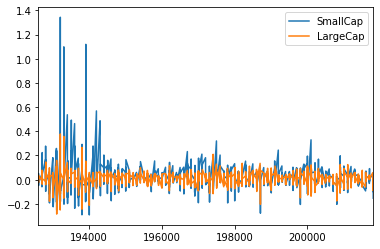

In [6]:
returns = pd.read_csv("data/Portfolios_Formed_on_ME_monthly_EW.csv",
                      header=0, index_col=0, parse_dates=True, na_values=-99.99
                     )
returns = returns[['Lo 10', 'Hi 10']]
returns.columns = ['SmallCap', 'LargeCap']
returns = returns/100
returns.plot.line()

To change the index date to proper data format we can use to_datetime() method of pandas

In [10]:
returns.index = pd.to_datetime(returns.index, format="%Y%m")
returns.head()

,SmallCap,LargeCap
1926-07-01,-0.0145,0.0329
1926-08-01,0.0512,0.0370
1926-09-01,0.0093,0.0067
1926-10-01,-0.0484,-0.0243
1926-11-01,-0.0078,0.0270


In [16]:
# returns.index = returns.index.to_period('M')
returns.head()

,SmallCap,LargeCap
1926-07,-0.0145,0.0329
1926-08,0.0512,0.0370
1926-09,0.0093,0.0067
1926-10,-0.0484,-0.0243
1926-11,-0.0078,0.0270


In [14]:
returns.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 1110 entries, 1926-07 to 2018-12
Freq: M
Data columns (total 2 columns):
SmallCap    1110 non-null float64
LargeCap    1110 non-null float64
dtypes: float64(2)
memory usage: 26.0 KB


# Compute Drawdowns

1. Compute a wealth index
2. Compute previous peaks
3. Compute drawdowns - which is the wealth value as a percentage of previous peaks

Wealth index is the value of the portfolio as it compounds over time. ie. the initial investment times the growth of a dollar over time. Growth of a dollar is the compounded effects of each of the returns.

In [15]:
wealth_index = 1000*(1+returns["LargeCap"]).cumprod()
wealth_index.head()

1926-07    1032.900000
1926-08    1071.117300
1926-09    1078.293786
1926-10    1052.091247
1926-11    1080.497711
Freq: M, Name: LargeCap, dtype: float64

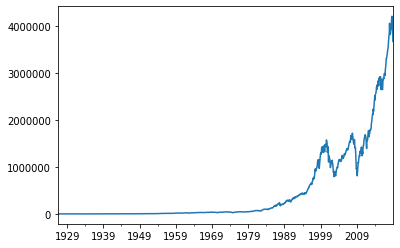

In [17]:
wealth_index.plot.line()

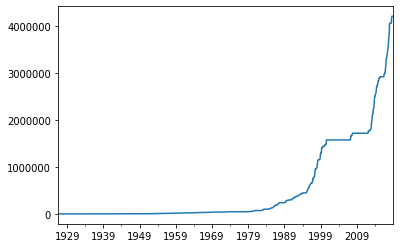

In [18]:
previous_peaks = wealth_index.cummax()
previous_peaks.plot.line()

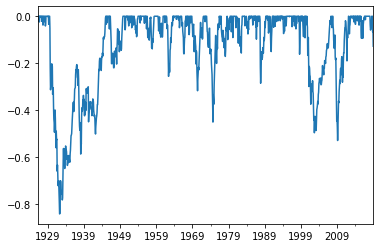

In [20]:
drawdowns = (wealth_index - previous_peaks)/ previous_peaks
drawdowns.plot.line()

Now, we want the max drawdoewn, we will see that the drawdowns are basically negative numbers, so to get max drawdown, we have to get the most minimum one.

In [21]:
drawdowns.head()

1926-07    0.0000
1926-08    0.0000
1926-09    0.0000
1926-10   -0.0243
1926-11    0.0000
Freq: M, Name: LargeCap, dtype: float64

In [22]:
drawdowns.min()

-0.8400375277943123

Since drawdown is a time series itself, we can find the drawdown from a particular point of time. The below code will give the maximum drawdown since 1976.

In [24]:
drawdowns["1976":].min()

-0.5280945042309304

We don't want the value of the max drawdown but instead when did the max ecord fdrawdown occur, we can easily get this as we are using the date as index by using .idxmin() which will basically find the min and then return the index of the for which the min has occured.

In [25]:
drawdowns["1976":].idxmin()

Period('2009-02', 'M')

We can create a function to input the series and return back the max drawdown.

In [26]:
def max_drawdown(return_series: pd.Series):
    """
    Takes a time series of asset returns
    Computes a dataframe that contains
    wealth index
    previous peaks
    drawdowns
    """
    wealth_index = 1000*(1+return_series).cumprod()
    previous_peaks = wealth_index.cummax()
    drawdowns = (wealth_index - previous_peaks)/previous_peaks
    return pd.DataFrame({
        "Wealth": wealth_index,
        "Peaks" : previous_peaks,
        "Drawdowns": drawdowns
    })

In [28]:
max_drawdown(returns["LargeCap"]).head()

,Wealth,Peaks,Drawdowns
1926-07,1032.900000,1032.900000,0.0000
1926-08,1071.117300,1071.117300,0.0000
1926-09,1078.293786,1078.293786,0.0000
1926-10,1052.091247,1078.293786,-0.0243
1926-11,1080.497711,1080.497711,0.0000


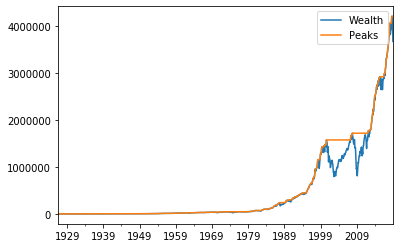

In [29]:
max_drawdown(returns["LargeCap"])[["Wealth", "Peaks"]].plot()

Similarly we can get a plot for the Small cap stocks as well.

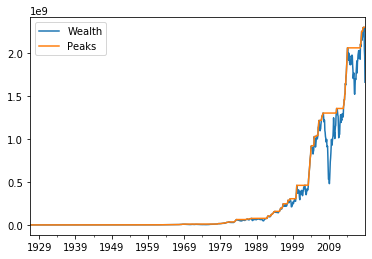

In [30]:
max_drawdown(returns["SmallCap"])[["Wealth", "Peaks"]].plot()